In [ ]:
# 基本套件
import pandas as pd
import numpy as np

# NLP
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# ML
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
import nltk

# 斷詞用
nltk.download("punkt")
nltk.download("punkt_tab")
# 停用詞用
nltk.download("stopwords")

# lemmatization 用（WordNet）
nltk.download("wordnet")
nltk.download("omw-1.4")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:

df = pd.read_csv("/content/final_dataset.csv")

df.head()


,text,emotion
0,i feel rather funny ending with so many dupes ...,fun
1,i feel surprised by the result,surprise
2,i am officially feeling festive,neutral
3,i suddenly found myself standing before this w...,surprise
4,i look at the meager pile of food i purchased ...,enthusiasm


In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer() #lemmatizer不同詞行統一：loved, loving → love

def preprocess_text(text):
    # 防呆：如果是 NaN 或不是字串
    if pd.isna(text):
        return ""

    text = str(text).lower()  # 1) 小寫化
    tokens = word_tokenize(text)  # 2) 斷詞

    # 3) 移除非字母、停用詞 + 4) 詞形還原
    tokens = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w.isalpha() and w not in stop_words #w.isalpha()移除移除：數字（123）、標點符號（! ? .）
        #w not in stop_words -> the, is, am, are, and, to, of, in, on, with 等等刪除不帶情緒資訊、只負責語法，不負責語意
    ]
    return " ".join(tokens)


In [ ]:
sample = df["text"].iloc[0]
print("原文:", sample)
print("清理後:", preprocess_text(sample))
#從資料集的 text 欄位、取出 第 1 筆句子（索引 0）


原文: i feel rather funny ending with so many dupes while i always prefer originals
清理後: feel rather funny ending many dupe always prefer original


In [ ]:
df["clean_text"] = df["text"].apply(preprocess_text) #df["text"] -> 取出資料集中所有原始句子 / .apply(preprocess_text) -> 逐筆套用剛寫好的前處理函數
df[["text", "clean_text"]].head()


,text,clean_text
0,i feel rather funny ending with so many dupes ...,feel rather funny ending many dupe always pref...
1,i feel surprised by the result,feel surprised result
2,i am officially feeling festive,officially feeling festive
3,i suddenly found myself standing before this w...,suddenly found standing woman dressed like pri...
4,i look at the meager pile of food i purchased ...,look meager pile food purchased week feeling p...


In [ ]:
text = df["text"].iloc[0]
print("原文:", text)

text_lower = str(text).lower()
print("\n(1) 小寫化:", text_lower)

tokens = word_tokenize(text_lower)
print("\n(2) 斷詞 tokens:", tokens)

filtered = [w for w in tokens if w.isalpha()]
print("\n(3) 只留字母:", filtered)

no_stop = [w for w in filtered if w not in stop_words]
print("\n(4) 移除停用詞:", no_stop)

lemm = [lemmatizer.lemmatize(w) for w in no_stop]
print("\n(5) 詞形還原:", lemm)

print("\n(6) 最終 clean_text:", " ".join(lemm))


原文: i feel rather funny ending with so many dupes while i always prefer originals

(1) 小寫化: i feel rather funny ending with so many dupes while i always prefer originals

(2) 斷詞 tokens: ['i', 'feel', 'rather', 'funny', 'ending', 'with', 'so', 'many', 'dupes', 'while', 'i', 'always', 'prefer', 'originals']

(3) 只留字母: ['i', 'feel', 'rather', 'funny', 'ending', 'with', 'so', 'many', 'dupes', 'while', 'i', 'always', 'prefer', 'originals']

(4) 移除停用詞: ['feel', 'rather', 'funny', 'ending', 'many', 'dupes', 'always', 'prefer', 'originals']

(5) 詞形還原: ['feel', 'rather', 'funny', 'ending', 'many', 'dupe', 'always', 'prefer', 'original']

(6) 最終 clean_text: feel rather funny ending many dupe always prefer original


In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()  # 小寫化
    tokens = word_tokenize(text)  # 斷詞
    tokens = [
        lemmatizer.lemmatize(w)
        for w in tokens
        if w.isalpha() and w not in stop_words  # 移除停用詞與非字母
    ]
    return " ".join(tokens)

df["clean_text"] = df["text"].apply(preprocess_text)

df[["text", "clean_text"]].head()


,text,clean_text
0,i feel rather funny ending with so many dupes ...,feel rather funny ending many dupe always pref...
1,i feel surprised by the result,feel surprised result
2,i am officially feeling festive,officially feeling festive
3,i suddenly found myself standing before this w...,suddenly found standing woman dressed like pri...
4,i look at the meager pile of food i purchased ...,look meager pile food purchased week feeling p...


In [ ]:
df.columns



Index(['text', 'emotion', 'clean_text'], dtype='object')

In [ ]:
df = df.dropna(subset=["emotion"])
#處理emotion中的nan值


In [ ]:
df[["text", "clean_text", "emotion"]].isna().sum()
#找nan值

,0
text,0
clean_text,0
emotion,0


In [ ]:
for c in df.columns:
    nunique = df[c].nunique(dropna=True) #計算該欄位「不重複值的數量」、dropna=True：不把 NaN 當成一個類別
    if nunique <= 30: #設一個「門檻值」只關心「種類數不多」的欄位 、30 通常就不是 label
        print(c, "unique =", nunique) #把「可能是 label 的欄位」印出來


emotion unique = 11


In [ ]:
from sklearn.model_selection import train_test_split #把資料分成「特徵（X）」與「標籤（y）」，準備進行監督式情緒分類。

X = df["clean_text"]   # 特徵：清理後文字
y = df["emotion"]      # ✅ 正確的情緒標籤欄位


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, #X：所有輸入文字（特徵）
    y, #y：對應的情緒標籤（正確答案）
    test_size=0.2, #20% 的資料 → 測試集（test）
    random_state=42, #每次執行，分到的資料都一樣
    stratify=y #stratify=y 如果不加 stratify=y：可能測試集某些情緒很少
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (85084,)
Test size: (21271,)


In [ ]:
y.value_counts() #計算「整個資料集」中每一種情緒各有幾筆資料（數量）
print(y_train.value_counts(normalize=True),"\n") #normalize=True → 顯示百分比
print(y_test.value_counts(normalize=True))

emotion
fun           0.094025
relief        0.094025
love          0.094025
surprise      0.094025
hate          0.094025
anger         0.094025
enthusiasm    0.094025
happiness     0.094025
sadness       0.094013
neutral       0.094001
empty         0.059788
Name: proportion, dtype: float64 

emotion
happiness     0.094025
neutral       0.094025
anger         0.094025
relief        0.094025
love          0.094025
enthusiasm    0.094025
fun           0.094025
hate          0.094025
surprise      0.094025
sadness       0.094025
empty         0.059753
Name: proportion, dtype: float64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer #把文字轉成模型看得懂的數值特徵（TF-IDF 向量）

tfidf = TfidfVectorizer(
    max_features=10000,   # 控制維度，避免過大 最多只保留 10,000 個最重要的詞（特徵）
    ngram_range=(1, 2)    # 單詞 + 連續兩詞（情緒很有幫助）
    #(1, 1)：只用單一詞 ->  happy / (1, 2)：用 單詞 + 連續兩詞 -> "not happy today"產生 not, happy, today, not happy, happy today
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF train shape:", X_train_tfidf.shape)
print("TF-IDF test shape:", X_test_tfidf.shape)


TF-IDF train shape: (85084, 10000)
TF-IDF test shape: (21271, 10000)


#用 TF-IDF 特徵訓練一個多類別 Logistic Regression 情緒分類模型，並用測試集評估它分情緒準不準。

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression( #建立 Logistic Regression 模型
    max_iter=1000,   #訓練最多跑 1000 次、避免模型「還沒學好就被迫停止」
    multi_class="multinomial" #這是多類別分類（11 種情緒）
)

lr.fit(X_train_tfidf, y_train) #模型看著X_train_tfidf（文字特徵）對照y_train（正確情緒） -> 學會「哪些詞組合 → 哪種情緒」
print("每個類別實際使用的迭代次數:", lr.n_iter_,'\n')
y_pred_lr = lr.predict(X_test_tfidf) #用測試集做預測 -> 把模型拿去「考試」，看它對沒看過的句子會怎麼判斷情緒

acc_lr = accuracy_score(y_test, y_pred_lr) #計算 Accuracy（整體正確率）
f1_lr = f1_score(y_test, y_pred_lr, average="macro") #對「每一種情緒」各算一個 F1 / 再把 11 個 F1 平均

print("Multinomial Logistic Regression")
print("Accuracy:", acc_lr)
print("Macro F1:", f1_lr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


每個類別實際使用的迭代次數: [117] 

Multinomial Logistic Regression
Accuracy: 0.8504536693150299
Macro F1: 0.8548775695784842


#用「Naive Bayes」模型，搭配同樣的 TF-IDF 特徵，來做情緒分類，並拿結果跟 Baseline（Logistic Regression）比較。

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train) #用訓練集的 TF-IDF 向量 對照正確情緒
y_pred_nb = nb.predict(X_test_tfidf) #把模型拿去判斷「沒看過的句子」看它會預測成哪一種情緒

acc_nb = accuracy_score(y_test, y_pred_nb) #Accuracy：整體準不準
f1_nb = f1_score(y_test, y_pred_nb, average="macro") #Macro F1：11 種情緒是否被公平對待

print("Naive Bayes")
print("Accuracy:", acc_nb)
print("Macro F1:", f1_nb)

Naive Bayes
Accuracy: 0.740444736965822
Macro F1: 0.7413006068457257


In [ ]:
from sklearn.svm import LinearSVC

svm = LinearSVC()
svm.fit(X_train_tfidf, y_train) #讓 SVM 從 TF-IDF 向量中學一條條「分類邊界」，把不同情緒在向量空間中分開。
y_pred_svm = svm.predict(X_test_tfidf) #把模型拿去判斷「沒看過的句子」是什麼情緒。

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average="macro")

print("Linear SVM")
print("Accuracy:", acc_svm)
print("Macro F1:", f1_svm)

Linear SVM
Accuracy: 0.8527102627991162
Macro F1: 0.8553063853819826


#TF-IDF + 三種模型比較

三個模型的評估結果（Accuracy、Macro F1）彙整成一個表格，方便比較不同模型的效能。

In [ ]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Linear SVM"],
    "Accuracy": [acc_lr, acc_nb, acc_svm],
    "Macro F1": [f1_lr, f1_nb, f1_svm]
})

results

,Model,Accuracy,Macro F1
0,Logistic Regression,0.850454,0.854878
1,Naive Bayes,0.740445,0.741301
2,Linear SVM,0.852710,0.855306


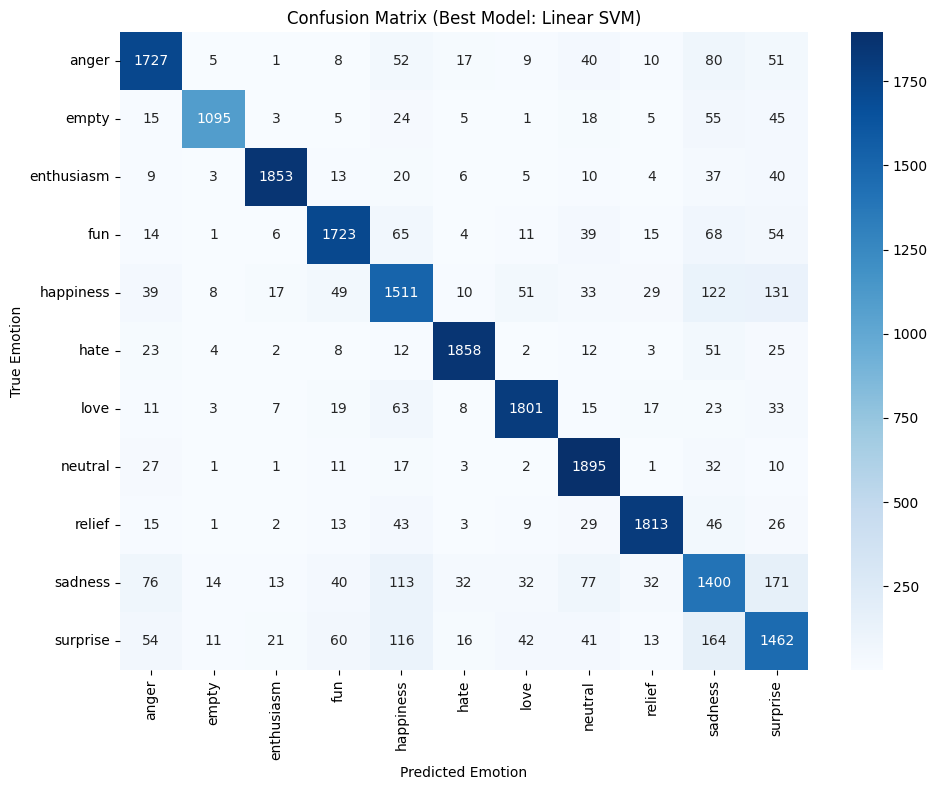

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = sorted(y.unique()) #定義情緒標籤順序 / 橫軸（預測）、縱軸（真實）

cm = confusion_matrix(y_test, y_pred_svm, labels=labels) #統計「真實情緒 vs 模型預測情緒」的次數

plt.figure(figsize=(10, 8))#畫成熱力圖（視覺化）
sns.heatmap(
    cm,
    xticklabels=labels,
    yticklabels=labels,
    annot=True, #annot=True：在格子裡直接顯示數字
    fmt="d", #fmt="d"：用整數顯示次數
    cmap="Blues" #Blues：藍色系，越深代表越多
)
plt.xlabel("Predicted Emotion") #橫軸：模型預測
plt.ylabel("True Emotion") #縱軸：真實標籤
plt.title("Confusion Matrix (Best Model: Linear SVM)")#標題：說清楚這是「最佳模型」
plt.tight_layout() #排版不擠
plt.show()


對「每一種情緒」，列出 Logistic Regression 判斷該情緒時，權重最高的前 10 個 TF-IDF 關鍵詞。

In [ ]:
feature_names = tfidf.get_feature_names_out() #取得 TF-IDF 的「詞彙表」

top_k = 10 #設定要看幾個關鍵詞

for emotion in lr.classes_: #lr.classes_ 是：Logistic Regression 看到的 所有情緒類別
    idx = list(lr.classes_).index(emotion) #找到該情緒在模型中的位置
    coef = lr.coef_[idx] #取出該情緒的權重向量（最關鍵）
    top_idx = coef.argsort()[-top_k:] #找出「權重最大的詞」
    keywords = [feature_names[i] for i in top_idx] #把「索引」轉回「實際文字」 -> 第 1234 維、第 8765 維 -> 'hate', 'so angry', 'furious', ...

    print(f"\nEmotion: {emotion}")
    print(", ".join(keywords))



Emotion: anger
tragedy, rage, encouraged, courage, average, encourage, enraged, outraged, discouraged, angry

Emotion: empty
hollowness, feel empty, avoidance, devoid, hollow, avoided, void, avoiding, avoid, empty

Emotion: enthusiasm
enthusiastically, meager, feel excited, excitedly, unenthusiastic, eagerness, eagerly, enthusiastic, eager, excited

Emotion: fun
functional, functioning, amusing, funeral, funk, fund, function, fun, joyful, funny

Emotion: happiness
enjoyable, enjoying, enjoyed, contented, discontent, joy, unhappy, content, enjoy, happy

Emotion: hate
damn, suck, hater, hate feeling, detest, loathe, hateful, whatever, hate, hated

Emotion: love
feeling, feel, affection, lover, affectionate, unloved, lovely, beloved, loved, love

Emotion: neutral
friendly, overwhelmed, lousy, rotten, artistic, impatient, disgusted, worthwhile, feeling, feel

Emotion: relief
discomfort, disease, relief, please, release, ease, comfort, pleased, uncomfortable, comfortable

Emotion: sadness


In [ ]:
mask = (df["emotion"] == "anger") & df["clean_text"].str.contains("encourag")
df.loc[mask, "text"]

,text
608,i was reaching out to encourage other mothers ...
889,i have a feeling that they will be outraged bu...
928,i need to make sure i can encourage students t...
1074,i feel more like the child and we can be very ...
1259,i have to say that i met some of the kindest w...
...,...
105201,i will encourage him when he s feeling beaten ...
105471,i resisted doing because i didn t feel it woul...
105612,i feel helpless about not being able to help h...
105760,i finished my prayers and feeling invigorated ...


In [ ]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 75.5 MB/s eta 0:00:00


In [ ]:
from gensim.models import Word2Vec #建立「詞嵌入（Word Embedding）」模型
#使用 gensim 提供的 Word2Vec 模型 這是 NLP 裡最經典的詞嵌入方法之一

# 把 clean_text 轉成 token list
train_tokens = X_train.apply(lambda x: x.split())  #句子轉成「單字清單」
#"so happy today love life" -> ["so", "happy", "today", "love", "life"]


w2v_model = Word2Vec(
    sentences=train_tokens,#訓練資料 -> 每一句話是一個 token list
    vector_size=100, #每個單字會變成 100 維向量，100 是常見、合理的大小
    window=5, #看「前後 5 個單字」來學語意
    min_count=5, #出現次數 < 5 次的字 直接丟掉
    workers=4, #workers=4 -> 使用 4 個 CPU 核心平行訓練，只是加速，不影響結果
    sg=1  #使用 Skip-gram 模型
    #sg=0：CBOW（快、適合大資料）
    #sg=1：Skip-gram（慢一點，但對小資料與稀有詞較好）
)


In [ ]:
w2v_model.wv.most_similar("happy", topn=5) #驗證剛剛訓練的 Word2Vec 有沒有學到語意
#most_similar("happy") -> 找出和「happy」向量距離最近的字
#topn=5 -> 只列出最相近的 前 5 個單字


[('alive', 0.6709202527999878),
 ('grateful', 0.6353087425231934),
 ('happier', 0.6350238919258118),
 ('jubilant', 0.6314336061477661),
 ('bouncy', 0.622468888759613)]

In [ ]:
import numpy as np #函式把「一句話」轉成「一個固定長度的向量」
def sentence_vector(sentence, model):
  words = sentence.split() #把句子切成單字
  vectors = [model.wv[w] for w in words if w in model.wv] #取出「有在 Word2Vec 裡的單字向量」
  if len(vectors) == 0: #如果一句話「沒有任何有效單字」，回傳一個 全 0 向量 保證維度一致，不會報錯
    return np.zeros(model.vector_size)

  return np.mean(vectors, axis=0)#把一句話中所有單字向量「取平均」

In [ ]:
X_train_emb = np.vstack(X_train.apply(lambda x: sentence_vector(x, w2v_model)))
#X_train：每一列是一句 clean_text
#apply(...)：對「每一句話」都做一次
#vstack 的意思是：把一堆「一維向量」直向堆疊成一個二維矩陣
X_test_emb = np.vstack(X_test.apply(lambda x: sentence_vector(x, w2v_model)))

print(X_train_emb.shape, X_test_emb.shape)


(85084, 100) (21271, 100)


Word2Vec（詞嵌入） + Logistic Regression

In [ ]:
lr_emb = LogisticRegression(max_iter=1000, multi_class="multinomial") #建立 Logistic Regression 模型
lr_emb.fit(X_train_emb, y_train)#用 Word2Vec 句子向量（100 維）對照 真實情緒標籤 教模型學分類規則
y_pred_lr_emb = lr_emb.predict(X_test_emb) #用測試集做預測

acc_lr_emb = accuracy_score(y_test, y_pred_lr_emb) #Accuracy：整體正確率
f1_lr_emb = f1_score(y_test, y_pred_lr_emb, average="macro") #11 種情緒是否被公平對待

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
print("Word2Vec + Logistic Regression")
print("Accuracy:", acc_lr_emb)
print("Macro F1:", f1_lr_emb)


Word2Vec + Logistic Regression
Accuracy: 0.7093225518311316
Macro F1: 0.7108211419156351


In [ ]:
svm_emb = LinearSVC() #建立 Linear SVM 模型
svm_emb.fit(X_train_emb, y_train) #用 Word2Vec 句子向量（100 維）搭配 真實情緒標籤 讓 SVM 學
y_pred_svm_emb = svm_emb.predict(X_test_emb) #用測試集做預測，拿模型沒看過的句子 預測它屬於哪一種情緒

acc_svm_emb = accuracy_score(y_test, y_pred_svm_emb)
f1_svm_emb = f1_score(y_test, y_pred_svm_emb, average="macro")


In [ ]:
print("Word2Vec + Linear SVM")
print("Accuracy:", acc_svm_emb)
print("Macro F1:", f1_svm_emb)


Word2Vec + Linear SVM
Accuracy: 0.7067368717972827
Macro F1: 0.7042185886568411


In [ ]:
final_results = pd.DataFrame({
    "Representation": ["TF-IDF", "TF-IDF", "TF-IDF", "Embedding", "Embedding"],
    "Model": [
        "Logistic Regression", "Naive Bayes", "Linear SVM",
        "Logistic Regression", "Linear SVM"
    ],
    "Accuracy": [
        acc_lr, acc_nb, acc_svm,
        acc_lr_emb, acc_svm_emb
    ],
    "Macro F1": [
        f1_lr, f1_nb, f1_svm,
        f1_lr_emb, f1_svm_emb
    ]
})

final_results


,Representation,Model,Accuracy,Macro F1
0,TF-IDF,Logistic Regression,0.850454,0.854878
1,TF-IDF,Naive Bayes,0.740445,0.741301
2,TF-IDF,Linear SVM,0.852710,0.855306
3,Embedding,Logistic Regression,0.709323,0.710821
4,Embedding,Linear SVM,0.706737,0.704219


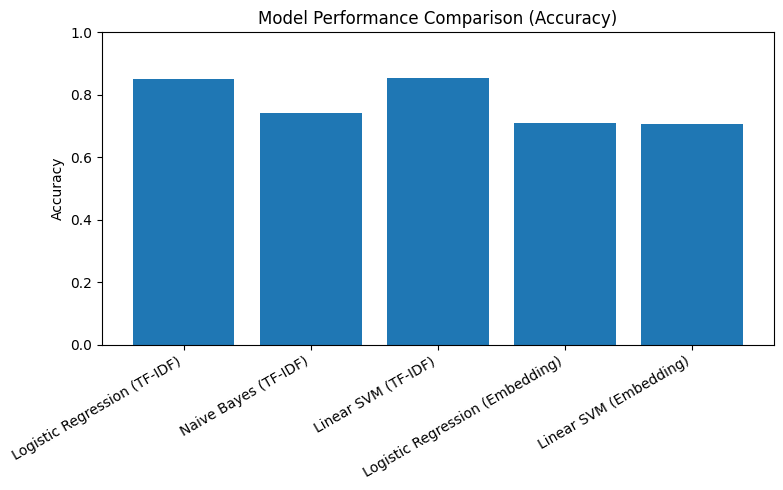

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

plt.bar(
    final_results["Model"] + " (" + final_results["Representation"] + ")",
    final_results["Accuracy"]
)

plt.xticks(rotation=30, ha="right")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison (Accuracy)")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



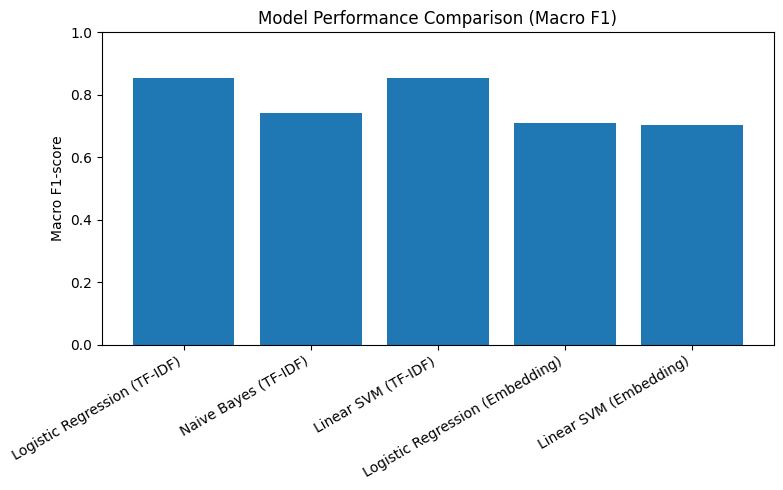

In [ ]:
plt.figure(figsize=(8, 5))

plt.bar(
    final_results["Model"] + " (" + final_results["Representation"] + ")",
    final_results["Macro F1"]
)

plt.xticks(rotation=30, ha="right")
plt.ylabel("Macro F1-score")
plt.title("Model Performance Comparison (Macro F1)")
plt.ylim(0, 1)

plt.tight_layout()
plt.show()
